In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality (Class label)
0,Male,17,7,4,7,3,2,extraverted
1,Male,19,4,5,4,6,6,serious
2,Female,18,7,6,4,5,5,dependable
3,Female,22,5,6,7,4,3,extraverted
4,Female,19,7,4,6,5,4,lively


In [4]:
train.shape

(709, 8)

In [5]:
test.head()

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality (class label)
0,Female,20,7,9,9,5,5,dependable
1,Male,17,5,4,5,2,4,serious
2,Female,25,5,5,7,2,4,serious
3,Female,18,6,2,7,4,7,serious
4,Female,19,2,4,7,1,3,responsible


In [6]:
test.shape

(315, 8)

In [7]:
train.isnull().sum()

Gender                       0
Age                          0
openness                     0
neuroticism                  0
conscientiousness            0
agreeableness                0
extraversion                 0
Personality (Class label)    0
dtype: int64

In [8]:
test.isnull().sum()

Gender                       0
Age                          0
openness                     0
neuroticism                  0
conscientiousness            0
agreeableness                0
extraversion                 0
Personality (class label)    0
dtype: int64

In [9]:
test.rename(columns={"Personality (class label)": "Personality (Class label)"}, inplace=True)

In [10]:
df = pd.concat([train, test], axis=0)

In [11]:
df.rename(columns={"Personality (Class label)": "Personality"}, inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1024 entries, 0 to 314
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Gender             1024 non-null   object
 1   Age                1024 non-null   int64 
 2   openness           1024 non-null   int64 
 3   neuroticism        1024 non-null   int64 
 4   conscientiousness  1024 non-null   int64 
 5   agreeableness      1024 non-null   int64 
 6   extraversion       1024 non-null   int64 
 7   Personality        1024 non-null   object
dtypes: int64(6), object(2)
memory usage: 72.0+ KB


In [13]:
df.describe()

,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion
count,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000
mean,19.857422,4.967773,4.627930,4.695312,4.833008,4.568359
std,2.555577,1.525904,1.708824,1.730339,1.658664,1.554866
min,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,18.000000,4.000000,4.000000,3.000000,4.000000,4.000000
50%,19.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,21.000000,6.000000,6.000000,6.000000,6.000000,6.000000
max,28.000000,8.000000,9.000000,9.000000,8.000000,8.000000


In [14]:
df["Personality"].value_counts()

Personality
serious        314
extraverted    227
responsible    166
dependable     159
lively         158
Name: count, dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

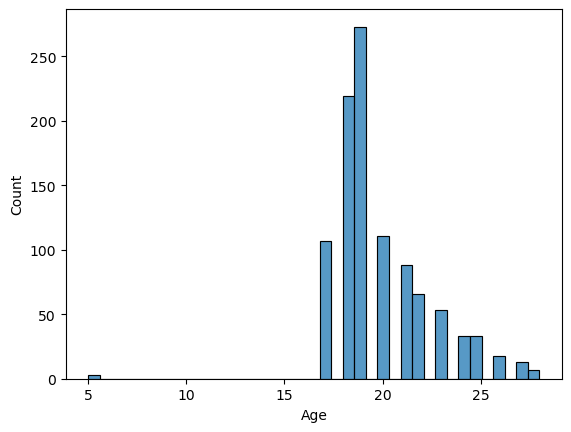

In [15]:
sns.histplot(data=df, x="Age")

In [16]:
df[df["Age"] < 10]

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality
441,Male,5,4,5,5,2,2,extraverted
458,Female,5,2,5,3,2,7,responsible
261,Female,5,5,5,5,5,5,responsible


In [17]:
df = df[df["Age"] > 10]

<Axes: xlabel='Age', ylabel='Count'>

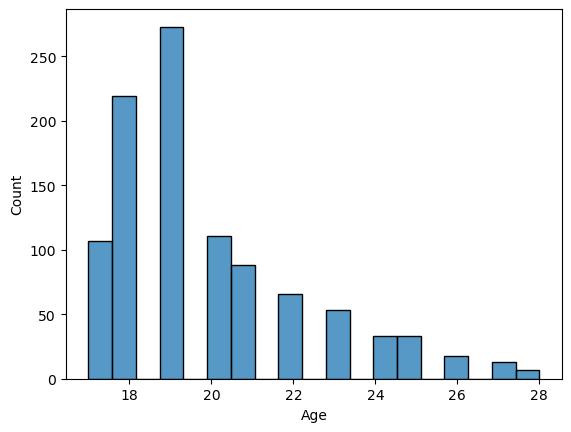

In [18]:
sns.histplot(data=df, x="Age")

<Axes: xlabel='openness', ylabel='Count'>

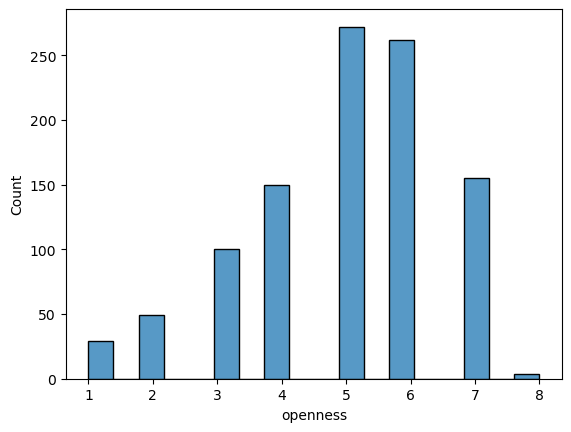

In [19]:
sns.histplot(data=df,  x="openness")

In [20]:
df["Gender"].value_counts()

Gender
Female    534
Male      486
5           1
Name: count, dtype: int64

In [21]:
df[df["Gender"] == "5"]

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality
449,5,21,2,5,6,1,5,serious


In [22]:
df = df[df["Gender"] != "5"]

* FEAMLE = 0
* MALE = 1

In [23]:
df["Gender"] = df['Gender'].map({"Female": 0, "Male": 1})

In [24]:
df["Gender"].value_counts()

Gender
0    534
1    486
Name: count, dtype: int64

<Axes: xlabel='agreeableness', ylabel='Count'>

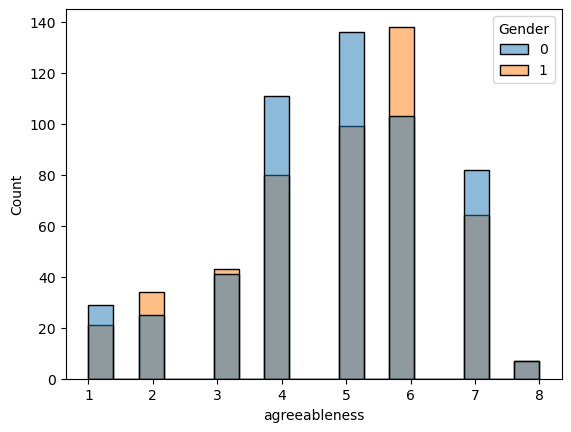

In [25]:
sns.histplot(data= df, x="agreeableness", hue="Gender" )

<Axes: xlabel='Personality', ylabel='count'>

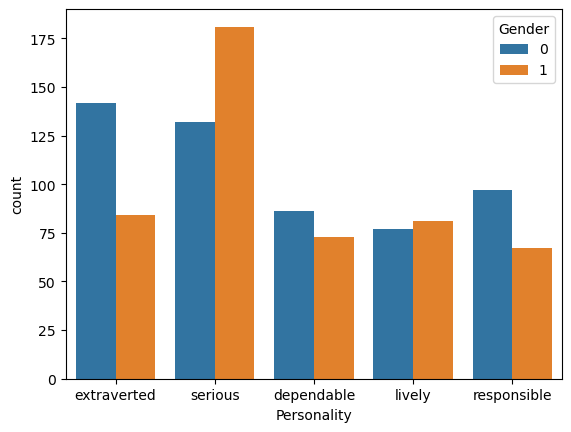

In [26]:
sns.countplot(data=df, x="Personality", hue="Gender")

coverting categorical variable "Personality" to numerical

In [27]:
df["Personality"].value_counts()

Personality
serious        313
extraverted    226
responsible    164
dependable     159
lively         158
Name: count, dtype: int64

In [28]:
df["Personality"] = df["Personality"].map({"serious": 0, "extraverted": 1, "responsible": 2, "dependable": 3, "lively": 4})

In [29]:
df["Personality"]

0      1
1      0
2      3
3      1
4      4
      ..
310    1
311    3
312    0
313    1
314    1
Name: Personality, Length: 1020, dtype: int64

In [30]:
df["Personality"].value_counts()

Personality
0    313
1    226
2    164
3    159
4    158
Name: count, dtype: int64

In [31]:
df.corr()["Personality"].sort_values()

extraversion        -0.169503
Gender              -0.042617
Age                 -0.033442
agreeableness       -0.026083
neuroticism         -0.020151
conscientiousness   -0.003898
openness             0.074613
Personality          1.000000
Name: Personality, dtype: float64

<Axes: >

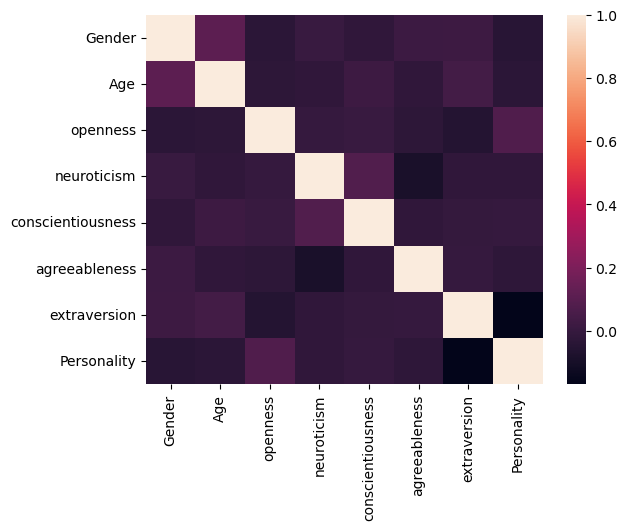

In [32]:
sns.heatmap(df.corr())

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X = df.drop("Personality", axis= 1)
y = df['Personality']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

**Performing Scaling**

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
scaler = MinMaxScaler()

In [38]:
X_train = scaler.fit_transform(X_train)

In [39]:
X_test = scaler.transform(X_test)

In [40]:
X_train.shape

(714, 7)

In [41]:
set(y_train)

{0, 1, 2, 3, 4}

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
linear = LinearRegression()

In [44]:
linear.fit(X_train, y_train)

LinearRegression()

In [47]:
linear.score(X_train, y_train)

0.039500090696781065

In [64]:
from sklearn.naive_bayes import GaussianNB

In [66]:
gb = GaussianNB()

In [67]:
gb.fit(X_train, y_train)

GaussianNB()

In [68]:
gb.score(X_test, y_test)

0.37254901960784315

In [69]:
gb.predict(X_test)

array([0, 2, 0, 4, 0, 1, 2, 0, 4, 2, 0, 0, 1, 3, 1, 1, 2, 2, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 2, 0, 4, 0, 4, 0, 0, 0, 0, 4, 0, 0, 0, 0,
       1, 4, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 4, 1, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 1, 0, 0, 4, 0, 1, 2, 0, 1, 1, 1, 1, 0, 4, 0, 0,
       0, 0, 2, 0, 2, 0, 4, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 2,
       1, 1, 1, 0, 2, 1, 1, 0, 1, 4, 0, 0, 1, 0, 0, 3, 0, 1, 1, 0, 2, 0,
       0, 0, 2, 1, 1, 1, 1, 1, 3, 0, 0, 0, 0, 1, 1, 0, 0, 3, 4, 1, 0, 0,
       2, 1, 1, 0, 0, 0, 0, 0, 0, 4, 0, 0, 4, 0, 1, 0, 1, 0, 0, 2, 0, 0,
       0, 0, 4, 1, 2, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 4, 0, 0, 4, 0,
       1, 0, 3, 0, 0, 4, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 0, 1, 0, 1, 0, 2,
       0, 1, 0, 0, 4, 1, 0, 1, 4, 1, 4, 1, 0, 0, 4, 2, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 4, 4, 0, 0, 0, 1, 1, 1, 1, 0, 1, 2, 1, 0, 0, 0, 1, 0,
       1, 0, 4, 1, 4, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [125]:
forest = RandomForestClassifier(max_depth=7, n_estimators=700, min_samples_split=2)

In [126]:
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, n_estimators=700)

In [127]:
forest.score(X_test, y_test)

0.35294117647058826